# Pre-Processing data

### Import data kaggle

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys() :
  print('User Uploaded file "{name}" with length {length} bytes'.format(name = fn, length= len(uploaded[fn])))


!mkdir -p ~/.kaggle/ && mv kaggle.json ~/.kaggle/ && chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json
User Uploaded file "kaggle.json" with length 69 bytes


In [ ]:
!kaggle datasets download -d jessicali9530/celeba-dataset

Dataset URL: https://www.kaggle.com/datasets/jessicali9530/celeba-dataset
License(s): other
 98% 1.30G/1.33G [00:08<00:00, 226MB/s]
100% 1.33G/1.33G [00:08<00:00, 160MB/s]


### unzip data

In [ ]:
from zipfile import ZipFile
file_name = "/content/celeba-dataset.zip"
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('Done')

Done


### import Libary

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
import hashlib
import glob
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from tensorflow.keras.layers import BatchNormalization

from PIL import Image
from io import BytesIO
import base64
from IPython.core.display import display, HTML

In [ ]:
BASIC_PATH = "/content/"
IMG_PATH = os.path.join(BASIC_PATH,'img_align_celeba/img_align_celeba/')
LIST_ATTR_PATH = os.path.join(BASIC_PATH,'list_attr_celeba.csv')

DF_ATTR = pd.read_csv(BASIC_PATH + 'list_attr_celeba.csv', delimiter=',')
print(IMG_PATH, LIST_ATTR_PATH)
DF_ATTR.head()

/content/img_align_celeba/img_align_celeba/ /content/list_attr_celeba.csv


,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
DF_PARTITION = pd.read_csv(BASIC_PATH + 'list_eval_partition.csv')

In [ ]:
DF_ATTR.set_index('image_id', inplace=True)
DF_ATTR.replace(to_replace=-1, value=0, inplace=True)
DF_ATTR.shape

(202599, 40)

In [ ]:
DF_PARTITION['partition'].value_counts().sort_index()

,count
partition,
0,162770
1,19867
2,19962


### Cek gambar duplikat

Contoh file duplikat:
107827.jpg
077673.jpg
146732.jpg
019039.jpg
157734.jpg
107222.jpg
093450.jpg
048395.jpg
Total file duplikat: 131


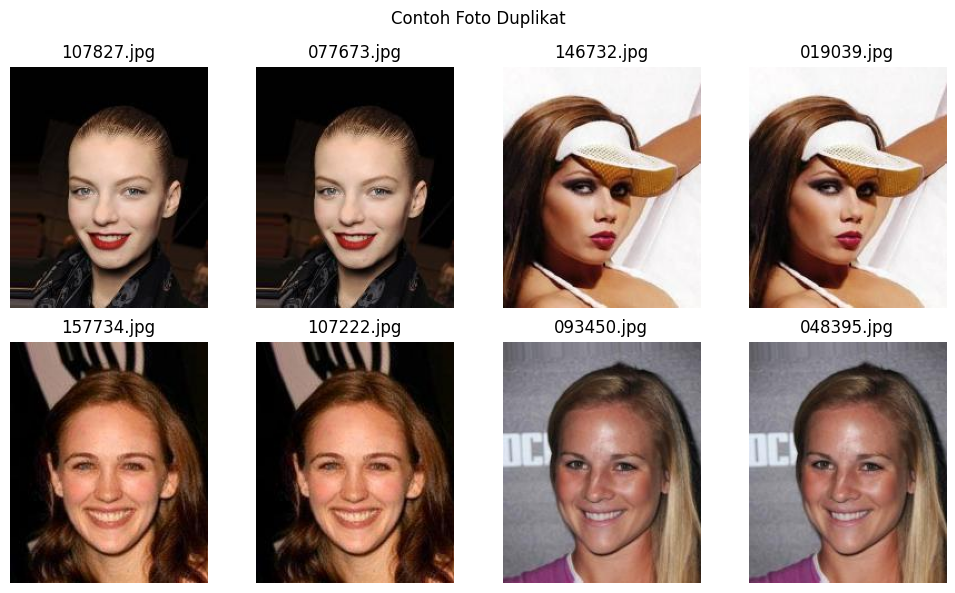

In [ ]:
# Mengecek File Duplikat, Menghitung Jumlahnya dan Menampilkan 5 File Contoh

# Library yang digunakan : os dan hashlib

# Mencari semua file dengan ekstensi gambar dalam folder
image_files = [file for file in os.listdir(IMG_PATH) if file.lower().endswith(('.jpg', '.jpeg', '.png'))]

# Menggunakan dictionary untuk menyimpan hash nilai dan daftar file dengan hash yang sama
duplicate_files = {}

# Memeriksa setiap file gambar
for file_name in image_files:
    file_path = os.path.join(IMG_PATH, file_name)
    with open(file_path, 'rb') as f:
        file_hash = hashlib.md5(f.read()).hexdigest()

    if file_hash not in duplicate_files:
        duplicate_files[file_hash] = [file_name]
    else:
        duplicate_files[file_hash].append(file_name)

# Menghitung total file yang duplikat
total_duplicate_files = sum(len(files) - 1 for files in duplicate_files.values())

# Menampilkan 8 contoh nama file yang duplikat
print("Contoh file duplikat:")
count = 0
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        for file_name in file_list[:8]:
            count += 1
            print(file_name)
            if count == 8:
                break
    if count == 8:
        break

# Menampilkan total file yang duplikat
print(f"Total file duplikat: {total_duplicate_files}")

# Mengumpulkan 8 contoh file duplikat
duplicate_examples = []
for file_list in duplicate_files.values():
    if len(file_list) > 1:
        duplicate_examples.extend(file_list[:8])
    if len(duplicate_examples) >= 10:
        break

# Menampilkan 8 foto duplikat dengan judul sebagai nama file
fig, axes = plt.subplots(2, 4, figsize=(10, 6))
for i, ax in enumerate(axes.flatten()):
    if i < len(duplicate_examples):
        file_name = duplicate_examples[i]
        file_path = os.path.join(IMG_PATH, file_name)
        image = plt.imread(file_path)
        ax.imshow(image)
        ax.set_title(file_name)
        plt.suptitle('Contoh Foto Duplikat')
    ax.axis('off')

plt.tight_layout()
plt.show()

# Code Modif dari Chat GPT

In [ ]:
# Membuat List Nama File Foto untuk Join dengan Nama File pada File list_attribute.csv

# Library yang digunakan : glob dan pandas

# Tentukan pola nama file foto (misal: JPEG, PNG)
file_ekstensi = '*.jpg' # Ganti dengan ekstensi file gambar yang sesuai

# Tentukan direktori tempat file-file gambar berada
direktori_foto = IMG_PATH

# Mendapatkan list nama file
nama_file = glob.glob(direktori_foto + '/' + file_ekstensi)

# List nama file dijadikan dataframe
data = pd.DataFrame(nama_file, columns = ['image_id'])

# Menampilkan dataframe
data.head()

# Code Modif dari Chat GPT

,image_id
0,/content/img_align_celeba/img_align_celeba/168...
1,/content/img_align_celeba/img_align_celeba/058...
2,/content/img_align_celeba/img_align_celeba/108...
3,/content/img_align_celeba/img_align_celeba/193...
4,/content/img_align_celeba/img_align_celeba/133...


In [ ]:
# Membuang karakter pertama hingga sebelum nama file
data['image_id'] = data['image_id'].str.split('\\').str[-1]
data.head()
# Note: menggunakan '\\' karena pemisah antar folder adalah '\'

# Code Modif dari Googling

,image_id
0,/content/img_align_celeba/img_align_celeba/168...
1,/content/img_align_celeba/img_align_celeba/058...
2,/content/img_align_celeba/img_align_celeba/108...
3,/content/img_align_celeba/img_align_celeba/193...
4,/content/img_align_celeba/img_align_celeba/133...


In [ ]:
# Load Dataset 'list_attribute.csv'
df_attribute = pd.read_csv(LIST_ATTR_PATH)
df_attribute.head()

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young
0,000001.jpg,-1,1,1,-1,-1,-1,-1,-1,-1,...,-1,1,1,-1,1,-1,1,-1,-1,1
1,000002.jpg,-1,-1,-1,1,-1,-1,-1,1,-1,...,-1,1,-1,-1,-1,-1,-1,-1,-1,1
2,000003.jpg,-1,-1,-1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,1,-1,-1,-1,-1,-1,1
3,000004.jpg,-1,-1,1,-1,-1,-1,-1,-1,-1,...,-1,-1,1,-1,1,-1,1,1,-1,1
4,000005.jpg,-1,1,1,-1,-1,-1,1,-1,-1,...,-1,-1,-1,-1,-1,-1,1,-1,-1,1


In [ ]:
# Cek Informasi pada DataFrame
df_attribute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202599 entries, 0 to 202598
Data columns (total 41 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   image_id             202599 non-null  object
 1   5_o_Clock_Shadow     202599 non-null  int64 
 2   Arched_Eyebrows      202599 non-null  int64 
 3   Attractive           202599 non-null  int64 
 4   Bags_Under_Eyes      202599 non-null  int64 
 5   Bald                 202599 non-null  int64 
 6   Bangs                202599 non-null  int64 
 7   Big_Lips             202599 non-null  int64 
 8   Big_Nose             202599 non-null  int64 
 9   Black_Hair           202599 non-null  int64 
 10  Blond_Hair           202599 non-null  int64 
 11  Blurry               202599 non-null  int64 
 12  Brown_Hair           202599 non-null  int64 
 13  Bushy_Eyebrows       202599 non-null  int64 
 14  Chubby               202599 non-null  int64 
 15  Double_Chin          202599 non-nu

In [ ]:
# Inner Join antara Objek 'data' dengan Objek 'list_attribute'
df_join = pd.merge(data, df_attribute, on = 'image_id', how = 'inner')
df_join.head()

# Code Modif dari Googling

,image_id,5_o_Clock_Shadow,Arched_Eyebrows,Attractive,Bags_Under_Eyes,Bald,Bangs,Big_Lips,Big_Nose,Black_Hair,...,Sideburns,Smiling,Straight_Hair,Wavy_Hair,Wearing_Earrings,Wearing_Hat,Wearing_Lipstick,Wearing_Necklace,Wearing_Necktie,Young


In [ ]:
# Cek Jumlah Bari yang telah Join Inner
df_join.shape

(0, 41)

In [ ]:
# join the partition with the attributes
DF_PARTITION.set_index('image_id', inplace=True)
DF_PARTITION = DF_PARTITION.join(DF_ATTR['Male'], how='inner')
DF_PARTITION.head()

,partition,Male
image_id,,
000001.jpg,0,0
000002.jpg,0,0
000003.jpg,0,1
000004.jpg,0,0
000005.jpg,0,0


In [ ]:
#ATTRIBUTES

# Read the attributes csv files in a dataframe format.
df = pd.read_csv(LIST_ATTR_PATH, usecols=['image_id','Male'])
df = df.sample(n=52000, random_state = 42).reset_index(drop=True)

# Reset the columns values to categorical./
df.loc[df['Male'] == -1,'Male'] = "Female"
df.loc[df['Male'] == 1,'Male'] = "Male"

# Change column names.
df.columns = ["image_id", "Gender"]

df.head(-10)

/tmp/ipython-input-4233253717.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Female' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df['Male'] == -1,'Male'] = "Female"


,image_id,Gender
0,093242.jpg,Male
1,121414.jpg,Female
2,010625.jpg,Male
3,082524.jpg,Female
4,073193.jpg,Female
...,...,...
51985,084774.jpg,Female
51986,131830.jpg,Male
51987,048110.jpg,Female
51988,089716.jpg,Male


### Visualisasi gambar

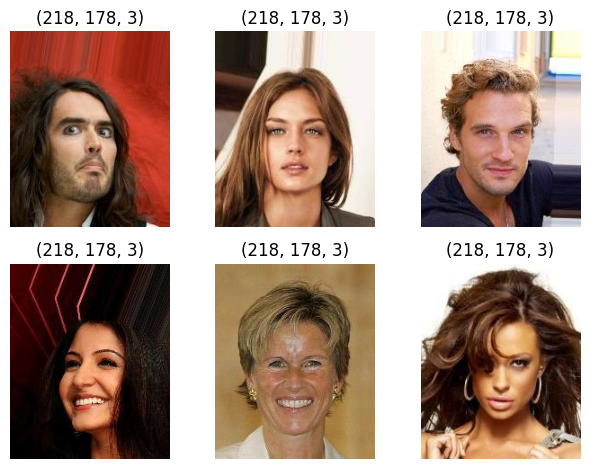

In [ ]:
# Display Multiple Sample Images.
for i in range(0, 6):
    plt.subplot(2, 3, i+1)

    # Read an Image.
    img = cv2.imread(IMG_PATH + '/' + df["image_id"][i])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Display Image.
    plt.imshow(img)
    plt.title(img.shape)
    plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
# Get the category distribution.
category_count = df["Gender"].value_counts()
print(category_count)

higher_category = list(category_count.index)[0]

Gender
Female    30351
Male      21649
Name: count, dtype: int64


In [ ]:
# Get the indices of the higher category indices images.
np.random.seed(42)
indices = df[df["Gender"] == higher_category].index
sample_size = category_count[0] - category_count[1]

# Drop the extra rows of female images to fix class imbalance problem.
drop_sample = np.random.choice(indices, sample_size, replace = False)
df = df.drop(drop_sample, axis = "index")

/tmp/ipython-input-4201299891.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  sample_size = category_count[0] - category_count[1]


<Axes: xlabel='Gender'>

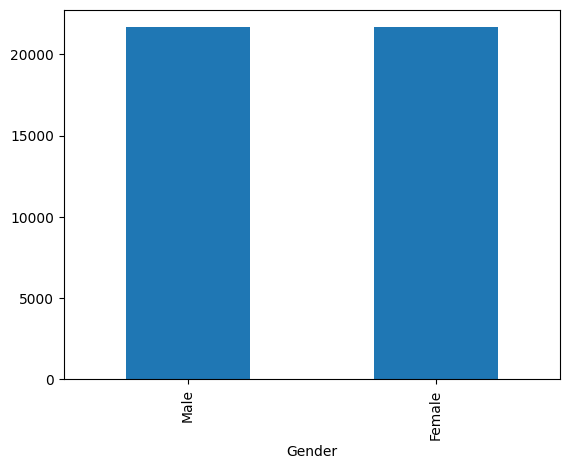

In [ ]:
df["Gender"].value_counts().plot.bar()

### Split dataset

In [ ]:
train_df, test_df = train_test_split(df, test_size=0.2)
test_df, validation_df = train_test_split(test_df, test_size=0.33)

In [ ]:
print("Total Train Sample Images : ", len(train_df))
print("Total Test Sample Images : ", len(test_df))
print("Total Validation Sample Images : ", len(validation_df))

Total Train Sample Images :  34638
Total Test Sample Images :  5802
Total Validation Sample Images :  2858


In [ ]:
IMAGE_SIZE = (218, 178)
BATCH_SIZE = 128

### Image generator

In [ ]:
# Generate Train Images Data Generator.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)
# Generate Validation Images Data Generator.
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validation_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col='Gender',
    target_size=IMAGE_SIZE,
    class_mode='binary',
    batch_size=BATCH_SIZE
)

Found 34638 validated image filenames belonging to 2 classes.
Found 2858 validated image filenames belonging to 2 classes.


In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df,
    IMG_PATH + "/",
    x_col='image_id',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

Found 5802 validated image filenames.


### Visualisasi dan Augmentasi data

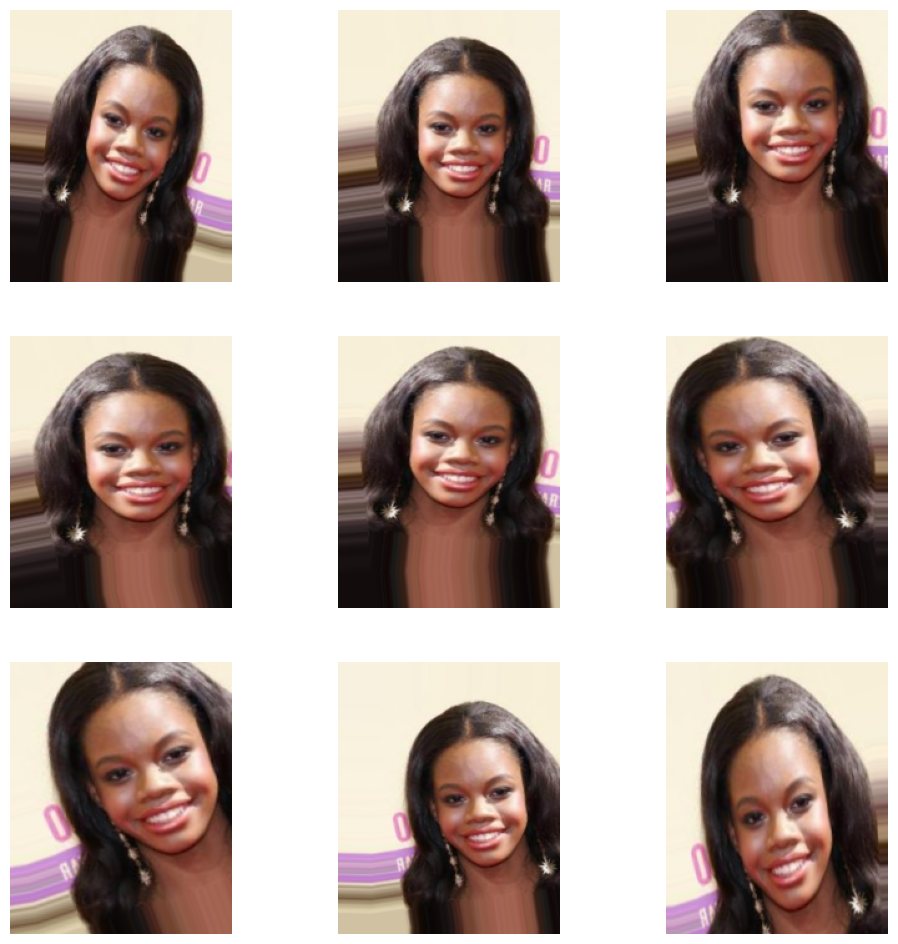

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Ambil satu batch dari train_generator
x_batch, y_batch = next(train_generator)

# Ambil satu gambar dari batch untuk augmentasi dan visualisasi
sample_image = x_batch[1]

# Visualisasi hasil augmentasi pada satu gambar
plt.figure(figsize=(12, 12))
for i in range(9):  # tampilkan 9 gambar
    # Terapkan transformasi acak dari ImageDataGenerator pada gambar
    augmented_image = train_datagen.random_transform(sample_image)  # Gunakan objek ImageDataGenerator
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_image)
    plt.axis("off")
plt.show()


# Pembuatan Model

### Import Libary model

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Dropout,GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

In [ ]:
# Transfer Learning dengan ResNet50
base_resnet_model = tf.keras.applications.ResNet50V2(weights='imagenet', include_top=False, input_shape= IMAGE_SIZE + (3,))

for layer in base_resnet_model.layers[-5:]:  # Unfreeze 5 layer terakhir
    layer.trainable = False

94668760/94668760 ━━━━━━━━━━━━━━━━━━━━ 5s 0us/step


### layer terakhir dan hyperparameter

In [ ]:
# Membuat Arsitektur Fully Connected
resnet_model = Sequential([
    base_resnet_model,
    GlobalAveragePooling2D(),
    Dense(1024, activation='relu'),
    Dropout(0.2),
    Dense(256, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dropout(0.2),
    Dense(2, activation="softmax")
])


# Kompile Model Deep Learning
base_learning_rate = 0.00001
resnet_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=base_learning_rate),
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)


### Calback

In [ ]:
# Callbacks
earlystop = EarlyStopping(patience=5)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy',
                                            patience=4,
                                            verbose=1,
                                            factor=0.5,
                                            min_lr=0.001)
callbacks = [earlystop, learning_rate_reduction]

### Training model

In [ ]:
# Training Model
history = resnet_model.fit(
    train_generator,
    validation_data=validation_generator,
    validation_steps=len(validation_df) // BATCH_SIZE,
    steps_per_epoch=len(train_df) // BATCH_SIZE,
    epochs=5,
    verbose=2,
    callbacks=callbacks
)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/backend/tensorflow/nn.py:717: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


270/270 - 506s - 2s/step - accuracy: 0.8275 - loss: 0.3685 - val_accuracy: 0.9435 - val_loss: 0.1460 - learning_rate: 1.0000e-05
Epoch 2/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


270/270 - 6s - 21ms/step - accuracy: 0.9297 - loss: 0.1683 - val_accuracy: 0.9428 - val_loss: 0.1465 - learning_rate: 1.0000e-05
Epoch 3/5
270/270 - 442s - 2s/step - accuracy: 0.9459 - loss: 0.1523 - val_accuracy: 0.9570 - val_loss: 0.1036 - learning_rate: 1.0000e-05
Epoch 4/5
270/270 - 5s - 20ms/step - accuracy: 0.9453 - loss: 0.1285 - val_accuracy: 0.9592 - val_loss: 0.0997 - learning_rate: 1.0000e-05
Epoch 5/5
270/270 - 385s - 1s/step - accuracy: 0.9634 - loss: 0.1066 - val_accuracy: 0.9631 - val_loss: 0.0922 - learning_rate: 1.0000e-05


In [ ]:
resnet_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ resnet50v2 (Functional)         │ (None, 7, 6, 2048)     │    23,564,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │     2,098,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │       262,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 2)              │            66 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 75,631,592 (288.51 MB)

 Trainable params: 24,843,810 (94.77 MB)

 Non-trainable params: 1,100,160 (4.20 MB)

 Optimizer params: 49,687,622 (189.54 MB)

In [ ]:
predict = resnet_model.predict(test_generator, steps=int(np.ceil(len(test_df) / BATCH_SIZE)))


46/46 ━━━━━━━━━━━━━━━━━━━━ 21s 376ms/step


In [ ]:
prediction = predict.argmax(axis=-1)
test_df['Prediction'] = ["Male" if ele == 1 else "Female" for ele in prediction]

In [ ]:
print(train_df['Gender'].value_counts())


Gender
Female    17321
Male      17317
Name: count, dtype: int64


In [ ]:
test_df

,image_id,Gender,Prediction
3798,001070.jpg,Female,Female
50109,021489.jpg,Female,Male
35914,031505.jpg,Male,Male
34272,017967.jpg,Male,Male
6674,112673.jpg,Female,Female
...,...,...,...
21069,053775.jpg,Female,Female
9945,076680.jpg,Female,Female
29873,043947.jpg,Female,Female
756,155509.jpg,Male,Male


In [ ]:
labels = ['Male','Female']

cm = confusion_matrix(test_df['Gender'], test_df["Prediction"], labels= labels)
cm

array([[2829,   53],
       [ 119, 2801]])

### Confusion Matrix

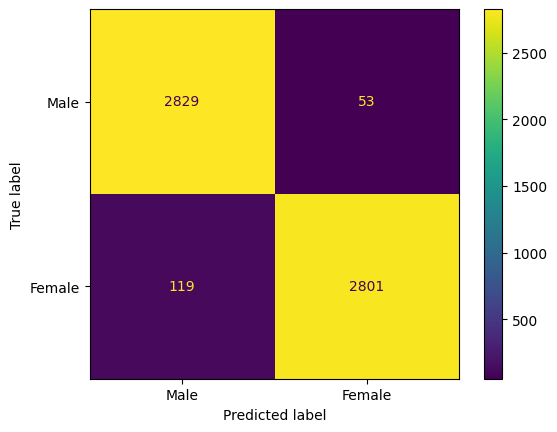

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=labels)
disp.plot()
plt.show()

### Metriks evaluasi Akurasi, prediksi , dll

In [ ]:
# Matriks Evaluasi

# Menghitung matriks confusion -> pada object 'cm_1' di atas

# Membuat laporan klasifikasi
target_names = ['Male', 'Female']  # Ganti dengan nama kelas yang sesuai
classification_rep = classification_report(test_df['Gender'], test_df['Prediction'],
                                            target_names=target_names, output_dict=True)

# Membuat DataFrame dari matriks confusion
df_confusion = pd.DataFrame(cm, columns=target_names, index=target_names)

# Membuat DataFrame dari laporan klasifikasi
df_classification = pd.DataFrame(classification_rep).transpose()

# Menampilkan tabel matriks evaluasi
print("Confusion Matrix:")
print(df_confusion)
print("\nClassification Report:")
print(df_classification)

# Code Modif from Chat GPT

Confusion Matrix:
        Male  Female
Male    2829      53
Female   119    2801

Classification Report:
              precision    recall  f1-score      support
Male           0.981430  0.959247  0.970211  2920.000000
Female         0.959634  0.981610  0.970497  2882.000000
accuracy       0.970355  0.970355  0.970355     0.970355
macro avg      0.970532  0.970428  0.970354  5802.000000
weighted avg   0.970603  0.970355  0.970353  5802.000000


In [ ]:
# Matrix Evaluasi
print(classification_report(test_df['Gender'], test_df['Prediction'], target_names = ['Male', 'Female']))

# Code Modif from Chat GPT

              precision    recall  f1-score   support

        Male       0.98      0.96      0.97      2920
      Female       0.96      0.98      0.97      2882

    accuracy                           0.97      5802
   macro avg       0.97      0.97      0.97      5802
weighted avg       0.97      0.97      0.97      5802



### Train Validation Accuracy

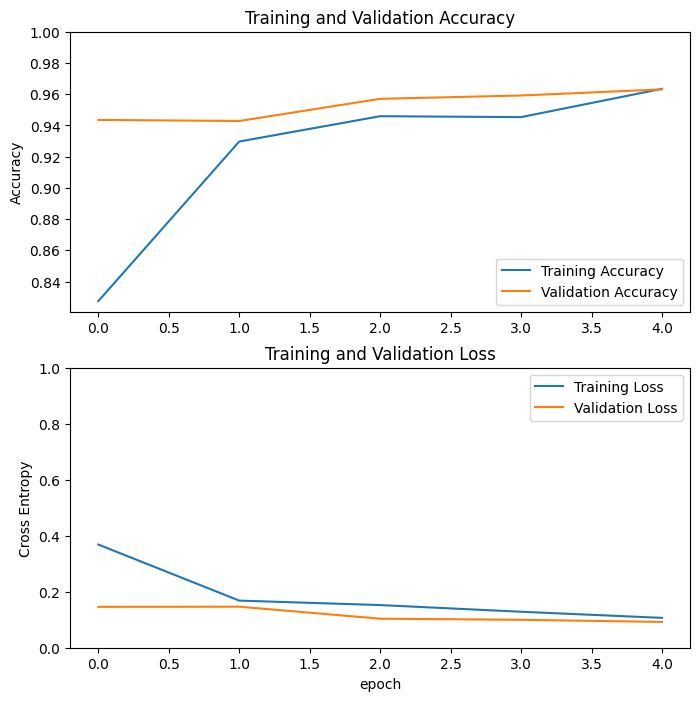

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

plt.figure(figsize=(8, 8))
plt.subplot(2, 1, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.ylabel('Accuracy')
plt.ylim([min(plt.ylim()),1])
plt.title('Training and Validation Accuracy')

plt.subplot(2, 1, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.ylabel('Cross Entropy')
plt.ylim([0,1.0])
plt.title('Training and Validation Loss')
plt.xlabel('epoch')
plt.show()

In [ ]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_woman_df = wrong_df[wrong_df['Gender'] == 'Male']
wrong_woman_df.head()

,image_id,Gender,Prediction
12717,064219.jpg,Male,Female
33377,050199.jpg,Male,Female
14536,015851.jpg,Male,Female
49602,117472.jpg,Male,Female
36517,116746.jpg,Male,Female


### Gambar yg diprediksi salah

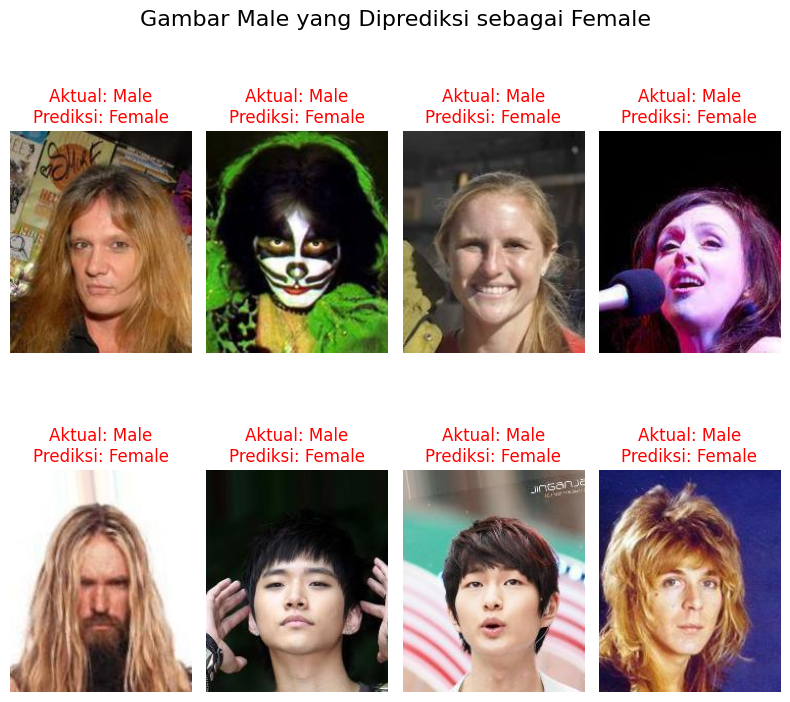

In [ ]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_woman_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Male yang Diprediksi sebagai Female", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


In [ ]:
# Menyiapkan Data yang Salah Prediksi
wrong_df = test_df[test_df['Gender'] != test_df['Prediction']]

# menyiapkan Data yang Male di Prediksi sebagai Female
wrong_male_df = wrong_df[wrong_df['Gender'] == 'Female']
wrong_male_df.head()

,image_id,Gender,Prediction
50109,021489.jpg,Female,Male
3250,138734.jpg,Female,Male
39899,006702.jpg,Female,Male
23788,121550.jpg,Female,Male
15252,079556.jpg,Female,Male


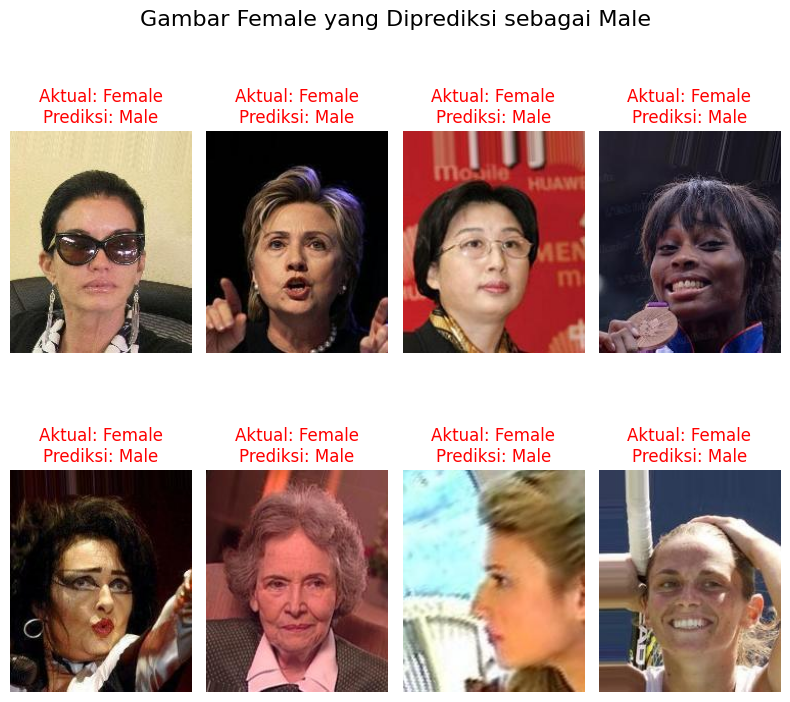

In [ ]:
import os
import matplotlib.pyplot as plt

# Create a subplot with 3 rows and 5 columns
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(8, 8))

# Iterate over the data frame subset and subplot axes
for index, (_, row) in enumerate(wrong_male_df.iterrows()):
    if index >= len(axes.flatten()):
        break

    ax = axes.flatten()[index]

    # Get the image file name and corresponding values
    image_file = row['image_id']
    actual_gender = row['Gender']
    predicted_gender = row['Prediction']

    # Read and plot the image
    image_path = os.path.join(IMG_PATH, image_file)
    image = plt.imread(image_path)
    ax.imshow(image)

    # Menambahkan judul dengan warna merah jika prediksi salah
    title_color = 'red' if predicted_gender != actual_gender else 'green'
    ax.set_title(f'Aktual: {actual_gender}\nPrediksi: {predicted_gender}', color=title_color)

    # Remove the axis ticks and labels
    ax.axis('off')

# Menambahkan judul keseluruhan di luar loop
plt.suptitle("Gambar Female yang Diprediksi sebagai Male", size=16)

# Adjust the spacing between subplots
plt.tight_layout()

# Display the figure
plt.show()


### Menguji model dengan data training


In [ ]:
gender_target = {0: 'Female', 1: 'Male'}

def img_to_display(filename):
    # inspired on this kernel:
    # https://www.kaggle.com/stassl/displaying-inline-images-in-pandas-dataframe
    # credits to stassl :)

    i = Image.open(filename)
    i.thumbnail((200, 200), Image.LANCZOS)

    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()


def display_result(filename, prediction, target):
    '''
    Display the results in HTML

    '''

    gender = 'Male'
    gender_icon = "https://i.imgur.com/nxWan2u.png"

    if prediction[1] <= 0.5:
        gender_icon = "https://i.imgur.com/oAAb8rd.png"
        gender = 'Female'

    display_html = '''
    <div style="overflow: auto;  border: 2px solid #D8D8D8;
        padding: 5px; width: 420px;" >
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <img src="{}" style="float: left;" width="40" height="40">
            <h3 style="margin-left: 50px; margin-top: 2px;">{}</h3> <br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Real Target: {}</p> <br><br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Filename: {}</p>
        </div>
    </div>
    '''.format(img_to_display(filename)
               , gender_icon
               , gender
               , "{0:.2f}%".format(round(max(prediction)*100,2))
               ,  gender_target[target]
               , filename.split('/')[-1]
               )

    display(HTML(display_html))

### Uji prediksi model

In [ ]:
def gender_prediction(filename):
    '''
    predict the gender

    input:
        filename: str of the file name

    return:
        array of the prob of the targets.

    '''

    im = cv2.imread(filename)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (178, 218)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0)

    # prediction
    result = resnet_model.predict(im)
    prediction = np.argmax(result)

    return result

1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step



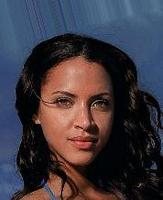

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step



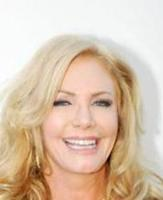

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step



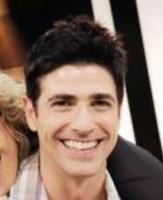

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step



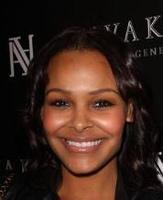

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step



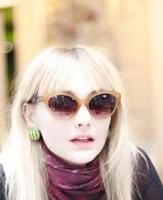

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step



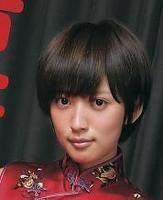

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step



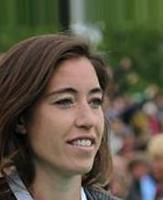

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step



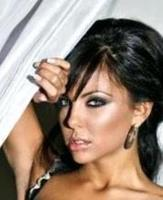

In [ ]:
df_to_test = DF_PARTITION[(DF_PARTITION['partition'] == 2)].sample(8)

for index, target in df_to_test.iterrows():
    result = gender_prediction(IMG_PATH + index)

    #display result
    display_result(IMG_PATH + index, result[0], target['Male'])

### Menguji model dengan upload image

Saving 3501655179.webp to 3501655179.webp
User uploaded file "3501655179.webp" with length 13080 bytes
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step



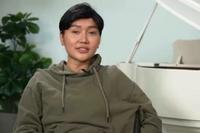

In [ ]:
# prompt: buatkan code dari keseluruhan training diatas untuk upload foto dari user dan akan langsung diklasifikasikan male atau female, tampilkan juga visual fotonya

from google.colab import files
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
from io import BytesIO
import base64
from IPython.core.display import display, HTML

# ... (Your existing code for model loading and preprocessing) ...

# Ensure your model is loaded (inception_model) and ready to use

gender_target = {0: 'Female', 1: 'Male'}

def img_to_display(img_bytes):
    i = Image.open(BytesIO(img_bytes))
    i.thumbnail((200, 200), Image.LANCZOS)
    with BytesIO() as buffer:
        i.save(buffer, 'jpeg')
        return base64.b64encode(buffer.getvalue()).decode()

def display_result(img_bytes, prediction):
    gender = 'Male'
    gender_icon = "https://i.imgur.com/nxWan2u.png"  # Male icon

    if prediction[1] <= 0.5:
        gender_icon = "https://i.imgur.com/oAAb8rd.png"  # Female icon
        gender = 'Female'

    # Calculate probability percentage
    probability_percentage = round(max(prediction) * 100, 2)

    display_html = '''
    <div style="overflow: auto; border: 2px solid #D8D8D8; padding: 5px; width: 420px;">
        <img src="data:image/jpeg;base64,{}" style="float: left;" width="200" height="200">
        <div style="padding: 10px 0px 0px 20px; overflow: auto;">
            <img src="{}" style="float: left;" width="40" height="40">
            <h3 style="margin-left: 50px; margin-top: 2px;">{}</h3> <br>
            <p style="margin-left: 50px; margin-top: -16px; font-size: 12px">Probability: {}%</p>
        </div>
    </div>
    '''.format(img_to_display(img_bytes), gender_icon, gender, probability_percentage)  # Pass the calculated percentage
    display(HTML(display_html))

def gender_prediction(img_bytes):
    im = Image.open(BytesIO(img_bytes))
    im = im.resize((178, 218))
    im = np.array(im)
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
    im = im.astype(np.float32) / 255.0
    im = np.expand_dims(im, axis=0)
    result = resnet_model.predict(im)
    return result[0]

uploaded = files.upload()

for fn in uploaded.keys():
    print('User uploaded file "{name}" with length {length} bytes'.format(
        name=fn, length=len(uploaded[fn])))
    result = gender_prediction(uploaded[fn])
    display_result(uploaded[fn], result)